In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../data/dataset.csv")

In [5]:
BASE_PRICE = 10
ALPHA = 2.0  # sensitivity factor

In [6]:
# Work on a single parking lot first
lot_id = "BHMBCCMKT01"
lot_data = df[df['SystemCodeNumber'] == lot_id].copy()

In [7]:
# Sort by time
lot_data['DateTime'] = pd.to_datetime(
    lot_data['LastUpdatedDate'] + " " + lot_data['LastUpdatedTime'],
    format="%d-%m-%Y %H:%M:%S"
)
lot_data = lot_data.sort_values('DateTime')

In [8]:
prices = [BASE_PRICE]

for i in range(1, len(lot_data)):
    prev_price = prices[-1]
    occ_rate = lot_data.iloc[i]['Occupancy'] / lot_data.iloc[i]['Capacity']
    new_price = prev_price + ALPHA * occ_rate
    
    # Cap price changes (smoothness: between 0.5x and 2x base)
    new_price = max(0.5*BASE_PRICE, min(2*BASE_PRICE, new_price))
    prices.append(new_price)

lot_data['Model1Price'] = prices

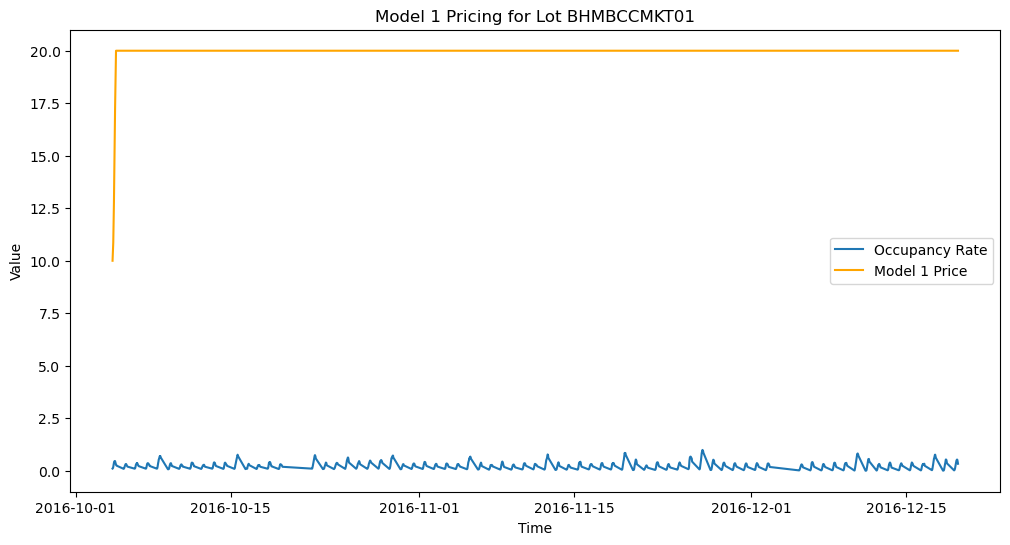

In [9]:
# Plot occupancy vs price
plt.figure(figsize=(12,6))
plt.plot(lot_data['DateTime'], lot_data['Occupancy']/lot_data['Capacity'], label="Occupancy Rate")
plt.plot(lot_data['DateTime'], lot_data['Model1Price'], label="Model 1 Price", color="orange")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title(f"Model 1 Pricing for Lot {lot_id}")
plt.legend()
plt.show()